<a href="https://colab.research.google.com/github/rojinadeuja/NLP-Deep-Learning/blob/main/CNN-Sentiment-Analysis-Moview-Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Embedding, Conv1D, SpatialDropout1D, GlobalMaxPool1D
from keras.callbacks import ModelCheckpoint
import os
import sklearn.metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
output_dir = '/content/drive/My Drive/Colab Notebooks/'
epochs = 4
batch_size = 128
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 200
pad_type = trunc_type = 'pre'
drop_embed = 0.2
n_dense = 256
dropout = 0.2
n_conv = 256
k_conv = 3

In [4]:
(X_train, y_train), (X_valid, y_valid) = imdb.load_data(num_words=n_unique_words)
X_train = pad_sequences(X_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
X_valid = pad_sequences(X_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 256)          49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [7]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=.20, callbacks=[modelcheckpoint])

Epoch 1/4
157/157 [==============================] - 38s 245ms/step - loss: 0.5434 - accuracy: 0.6966 - val_loss: 0.3433 - val_accuracy: 0.8498
Epoch 2/4
157/157 [==============================] - 36s 231ms/step - loss: 0.2878 - accuracy: 0.8798 - val_loss: 0.2800 - val_accuracy: 0.8866
Epoch 3/4
157/157 [==============================] - 35s 222ms/step - loss: 0.1915 - accuracy: 0.9265 - val_loss: 0.2767 - val_accuracy: 0.8878
Epoch 4/4
157/157 [==============================] - 35s 222ms/step - loss: 0.1282 - accuracy: 0.9547 - val_loss: 0.3052 - val_accuracy: 0.8850


In [10]:
# In my case it was the fourth one: 'weights.04.hdf5'
model.load_weights(output_dir+'/weights.04.hdf5')

y_hat = model.predict_proba(X_valid)

Instructions for updating:
Please use `model.predict()` instead.


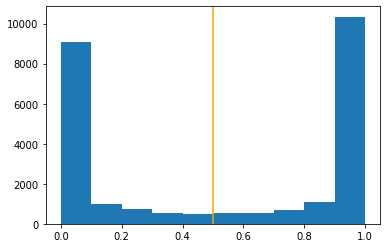

In [11]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')